In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('D:/Data_Analyst/NovaNectar_InternTask/CarPrice_Assignment.csv')
print(df.head())   
print(df.info())   
print(df.describe())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [ ]:
print(df.isnull().sum())  


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
threshold = 0.5  
df = df.dropna(thresh=len(df) * (1 - threshold), axis=1)


In [5]:
df.dropna(inplace=True)


In [6]:
df.drop(columns=['car_ID'], inplace=True)


In [7]:
df.sort_values(by="price", ascending=False, inplace=True)


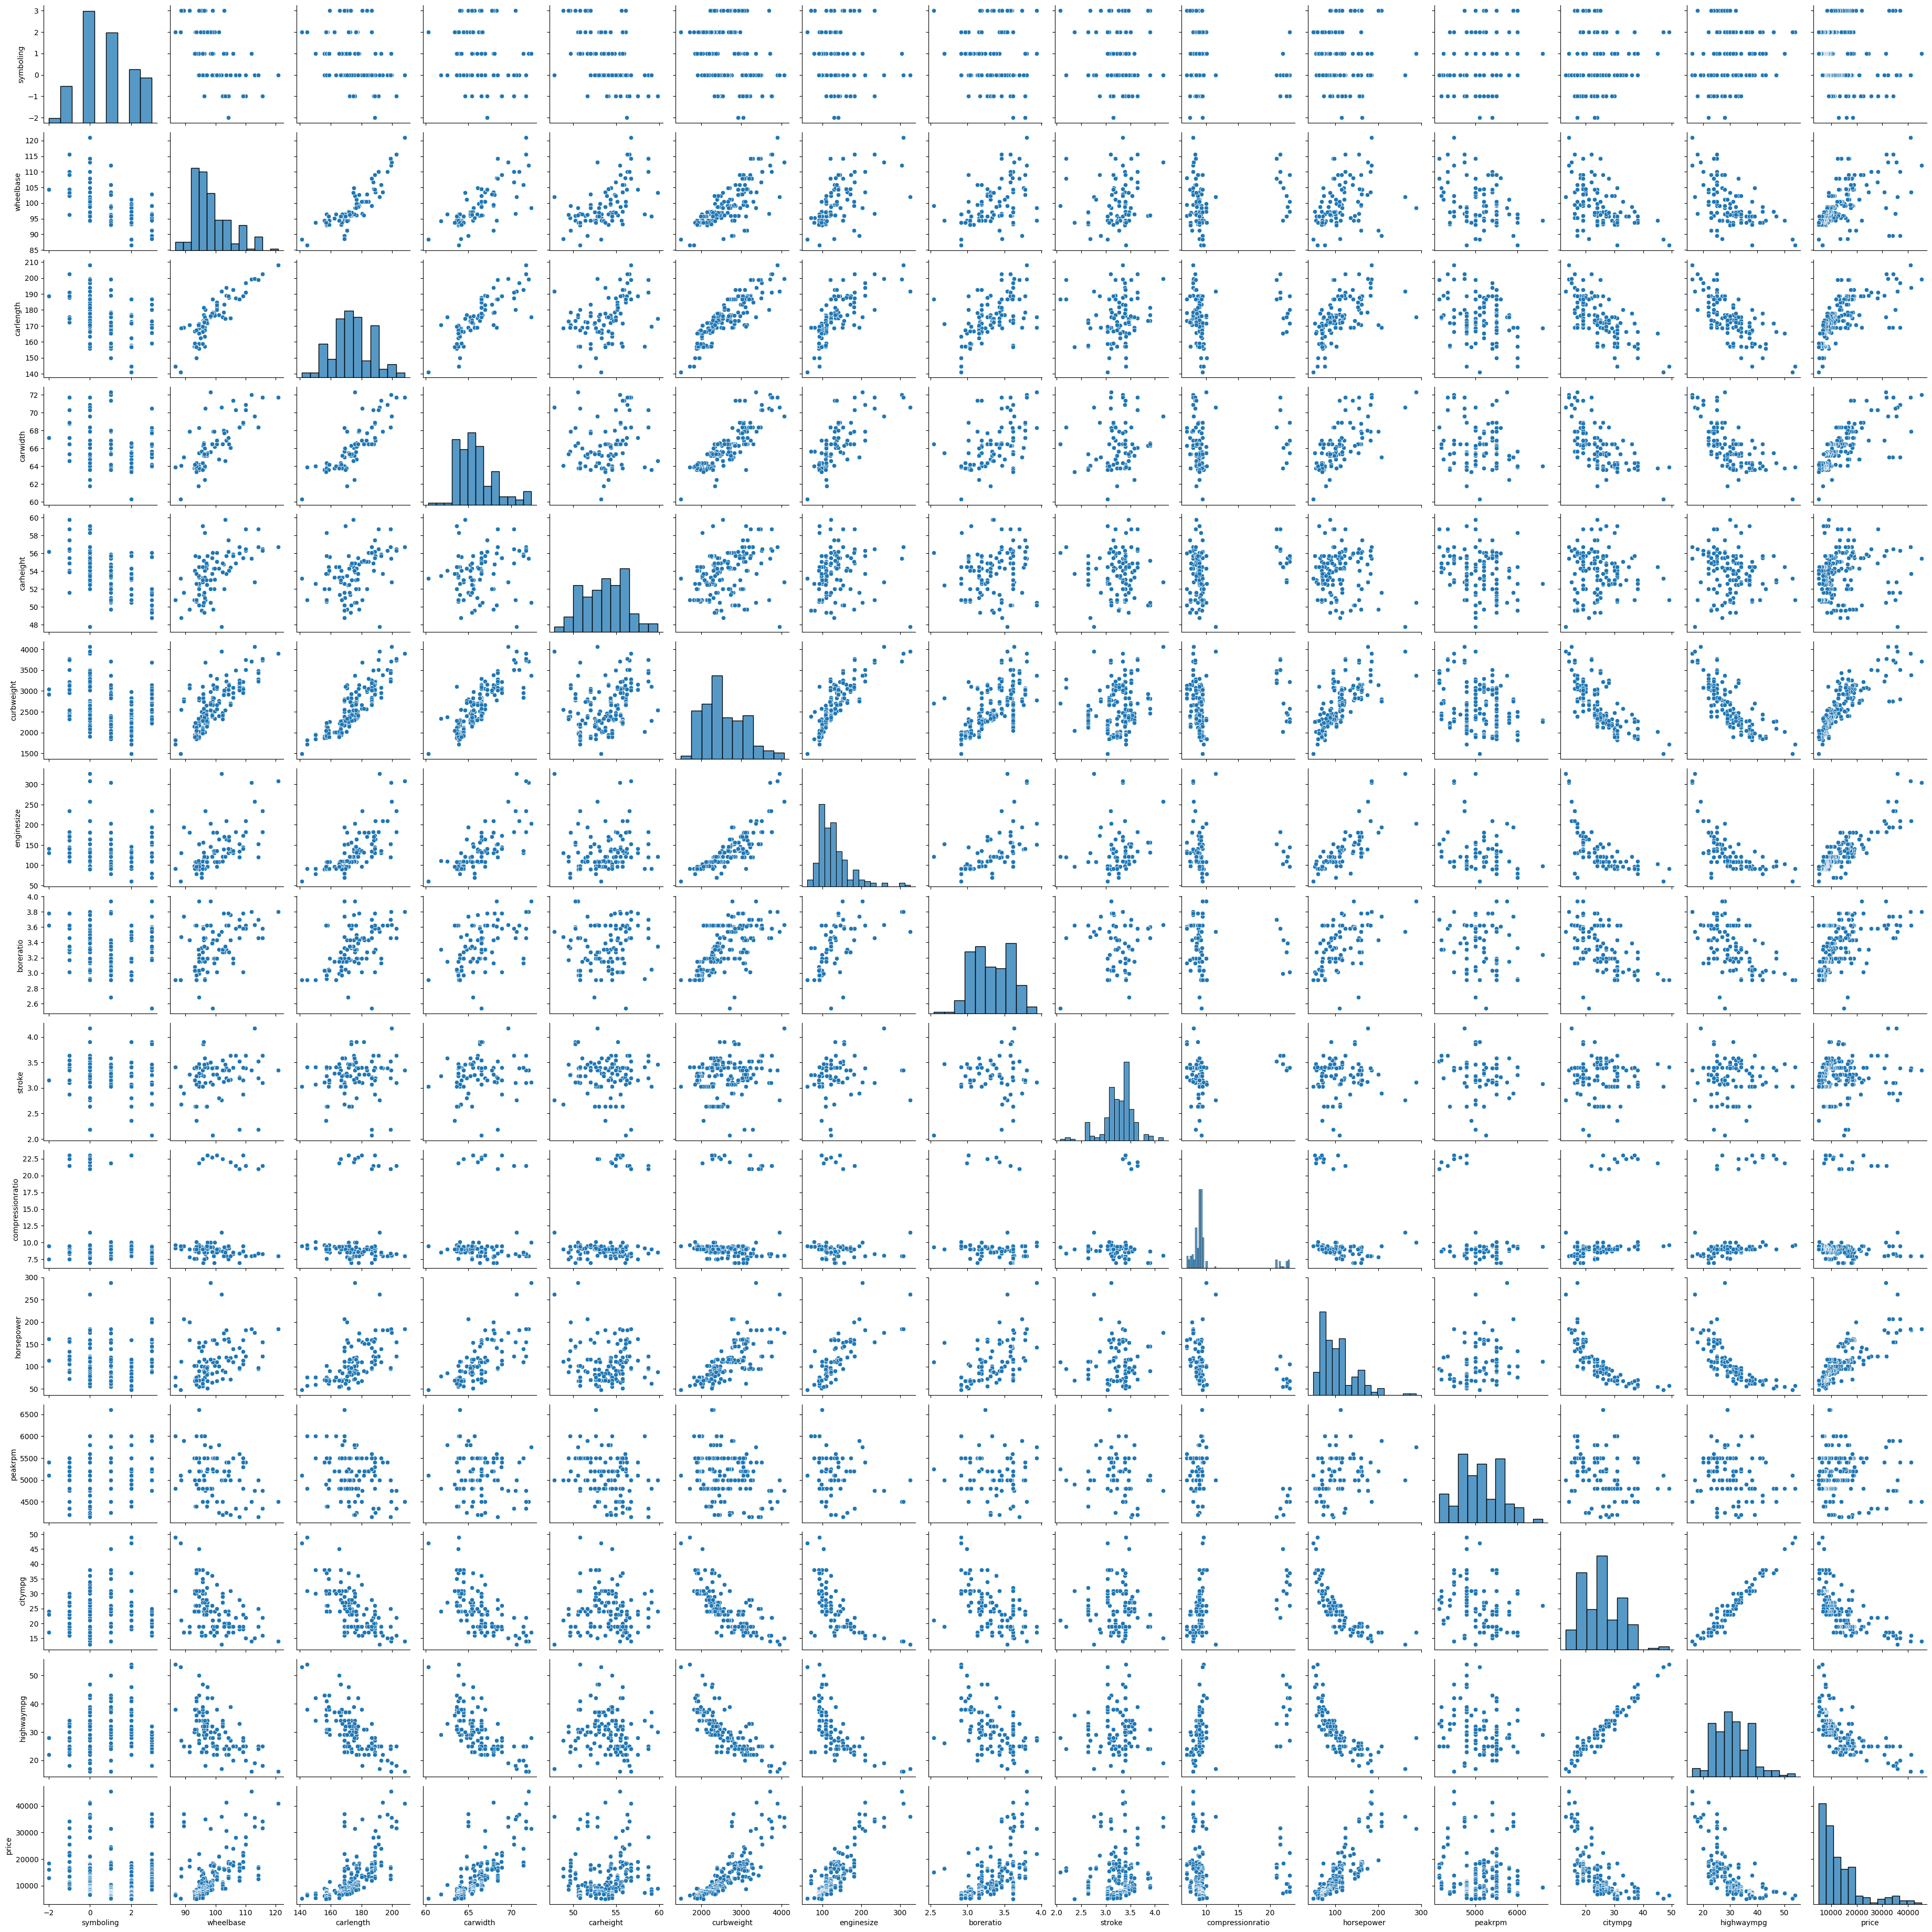

In [8]:
sns.pairplot(df)
plt.show()


In [10]:
print(df.dtypes)


symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [11]:
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns


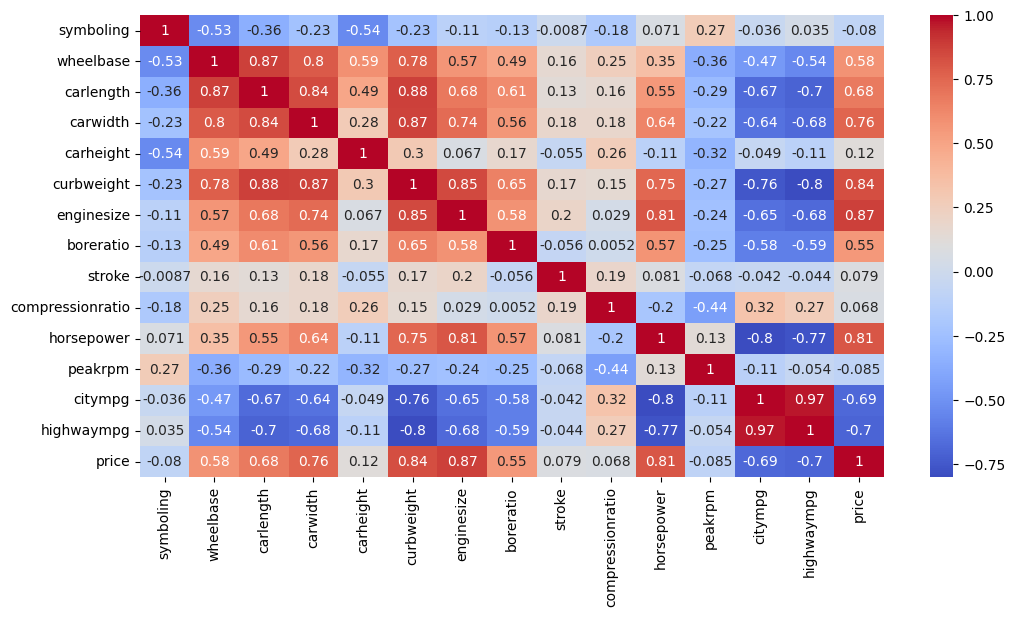

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()


In [13]:
print(df.columns)


Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [ ]:
print(df.columns.str.strip())  


Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [15]:
df.columns = df.columns.str.lower()


In [35]:
print(df.columns)


Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carCompany'],
      dtype='object')


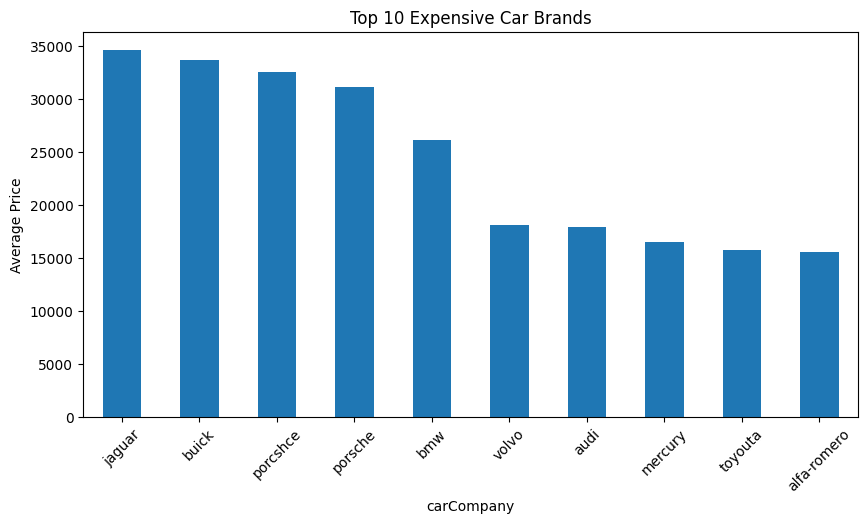

In [36]:
top_10 = df.groupby('carCompany')['price'].mean().sort_values(ascending=False).head(10)
top_10.plot(kind='bar', figsize=(10, 5))
plt.ylabel('Average Price')
plt.title('Top 10 Expensive Car Brands')
plt.xticks(rotation=45)
plt.show()


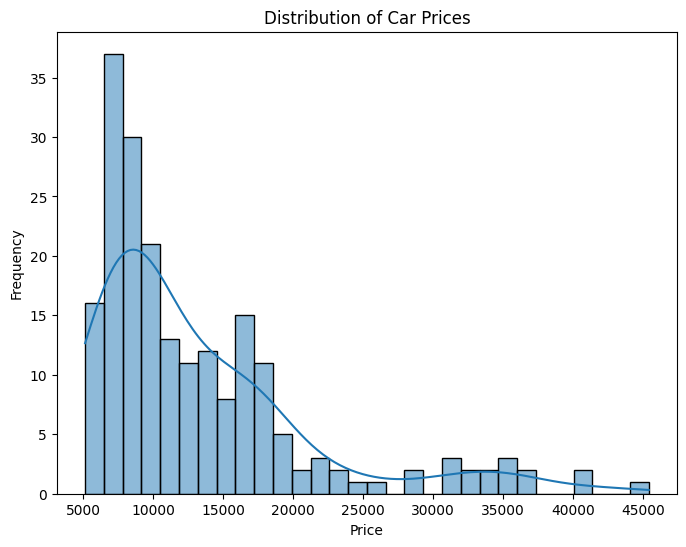

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()
